# WASP-43

In [1]:
import lightkurve as lk
from glob import glob
import ombre as om
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

In [2]:
name = 'WASP-43'

In [3]:
fnames = np.asarray(glob(f'/Volumes/Nibelheim/hst/data/{name}/*.fits'))

In [4]:
obs = om.Observation.from_files(fnames)

In [5]:
obs

WASP-43 [16 Visits]

In [6]:
clc = lk.search_lightcurve(name, author='SPOC', exptime=120).download_all().stitch().remove_nans().flatten(501)
clc.flux = clc.flux.value * u.electron/u.s
clc.flux_err = clc.flux_err.value * u.electron/u.s

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

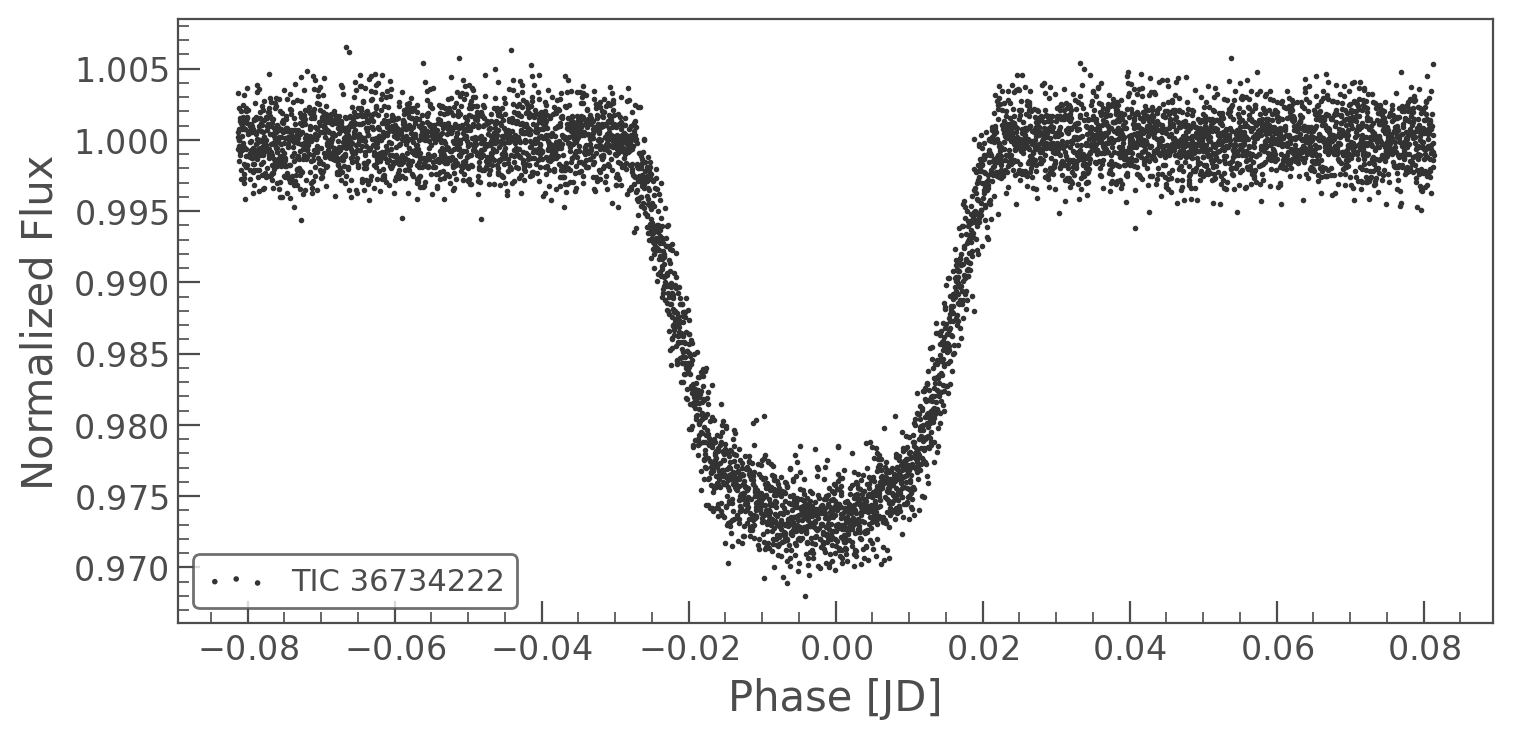

In [7]:
k = np.abs(((clc.time.value - (obs.t0 - 2457000 + obs.period/2))/obs.period) % 1 - 0.5) < 0.1
clc[k].fold(obs.period, obs.t0 - 2457000).scatter()

In [8]:
obs.fit_transit(x_suppl=clc.time.value[k] + 2457000,
                y_suppl=clc.flux.value[k],
                yerr_suppl=clc.flux_err.value[k],
                exptime_suppl=np.median(np.diff(clc.time.value)), fit_t0=True, fit_period=True, fit_inc=True)

<AxesSubplot:xlabel='Phase', ylabel='$e^-s^{-1}$'>

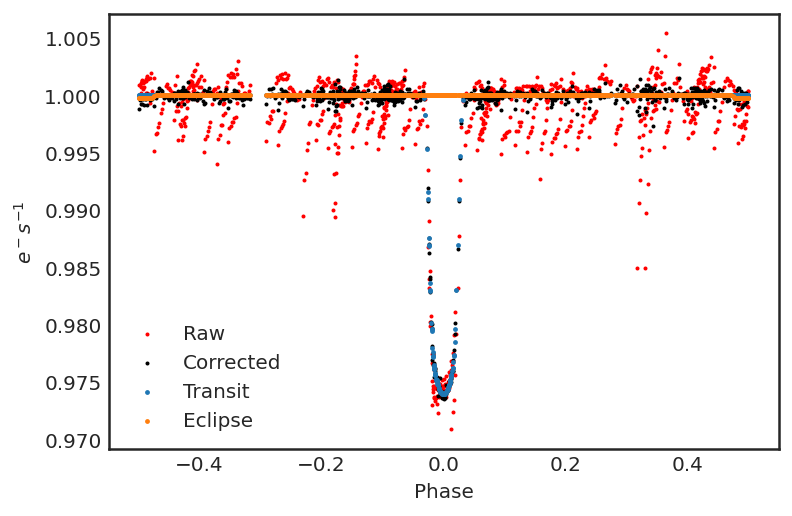

In [9]:
obs.plot()

In [10]:
obs.fit_model()

Fitting Transit/Eclipse Model:   0%|          | 0/16 [00:00<?, ?it/s]

Fitting Transit/Eclipse Model:   6%|▋         | 1/16 [00:14<03:31, 14.11s/it]

Fitting Transit/Eclipse Model:  12%|█▎        | 2/16 [00:41<05:03, 21.65s/it]

Fitting Transit/Eclipse Model:  19%|█▉        | 3/16 [01:03<04:48, 22.17s/it]

Fitting Transit/Eclipse Model:  25%|██▌       | 4/16 [01:09<03:06, 15.56s/it]

Fitting Transit/Eclipse Model:  31%|███▏      | 5/16 [01:18<02:25, 13.22s/it]

Fitting Transit/Eclipse Model:  38%|███▊      | 6/16 [01:24<01:46, 10.67s/it]

Fitting Transit/Eclipse Model:  44%|████▍     | 7/16 [01:30<01:22,  9.15s/it]

Fitting Transit/Eclipse Model:  50%|█████     | 8/16 [01:39<01:13,  9.23s/it]

Fitting Transit/Eclipse Model:  56%|█████▋    | 9/16 [01:50<01:09,  9.88s/it]

Fitting Transit/Eclipse Model:  62%|██████▎   | 10/16 [02:15<01:27, 14.52s/it]

Fitting Transit/Eclipse Model:  69%|██████▉   | 11/16 [02:35<01:20, 16.12s/it]

Fitting Transit/Eclipse Model:  75%|███████▌  | 12/16 [02:40<00:50, 12.69s/it]

Fitting Transit/Eclipse Model:  81%|████████▏ | 13/16 [02:47<00:33, 11.11s/it]

Fitting Transit/Eclipse Model:  88%|████████▊ | 14/16 [02:53<00:18,  9.35s/it]

Fitting Transit/Eclipse Model:  94%|█████████▍| 15/16 [02:58<00:08,  8.11s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 16/16 [03:06<00:00,  8.23s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 16/16 [03:06<00:00, 11.67s/it]

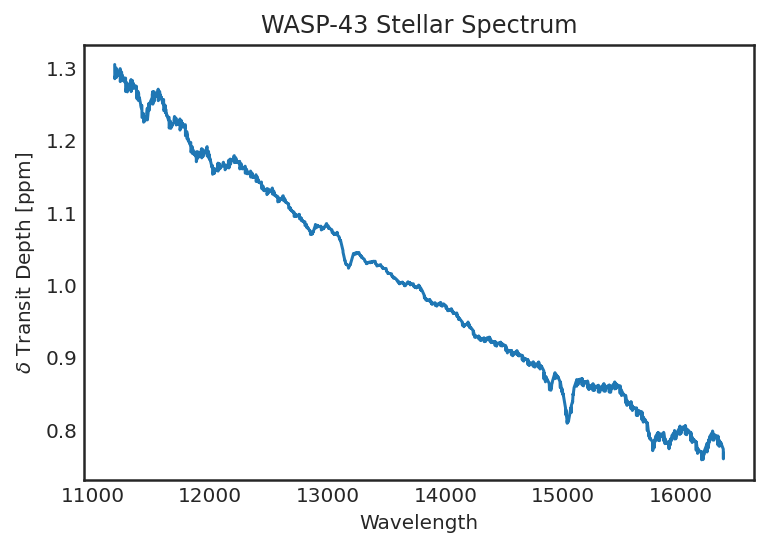

In [11]:
spec = obs.stellar_spectra
spec.plot()
spec.hdulist.writeto(f'results/{name}_stellar_spectrum.fits', overwrite=True)

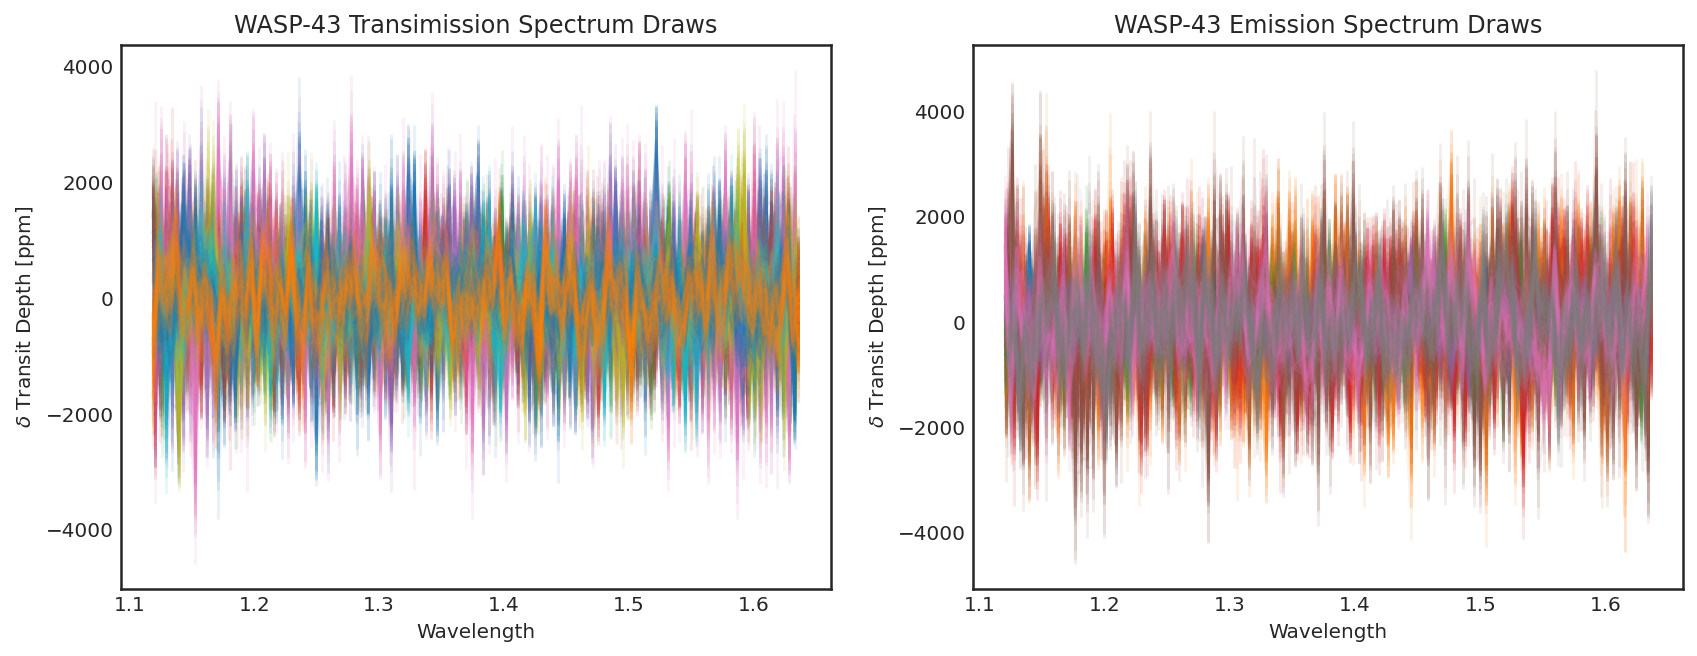

In [12]:
obs.plot_spectra()

[Text(0.5, 1.0, 'WASP-107 Transmission Spectrum')]

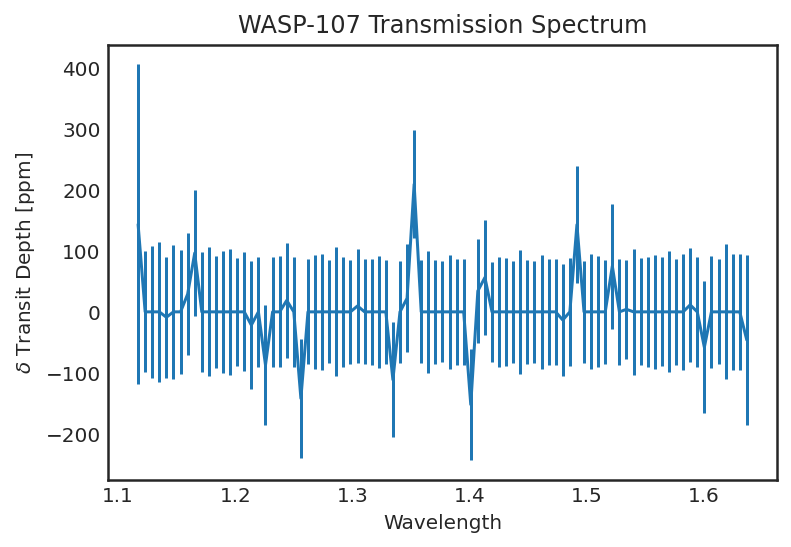

In [13]:
ax = om.Spectra([visit.transmission_spectrum for visit in obs]).flatten().bin(bins=np.linspace(0.8, 1.7, 150)).plot()
ax.set(title='WASP-107 Transmission Spectrum')

In [14]:
from astropy.io import fits
try:
    hdulist = om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_transmission.fits')
except:
    pass
try:    
    hdulist = om.Spectra([visit.emission_spectrum for visit in obs if visit.emission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_emission.fits')
except:
    pass

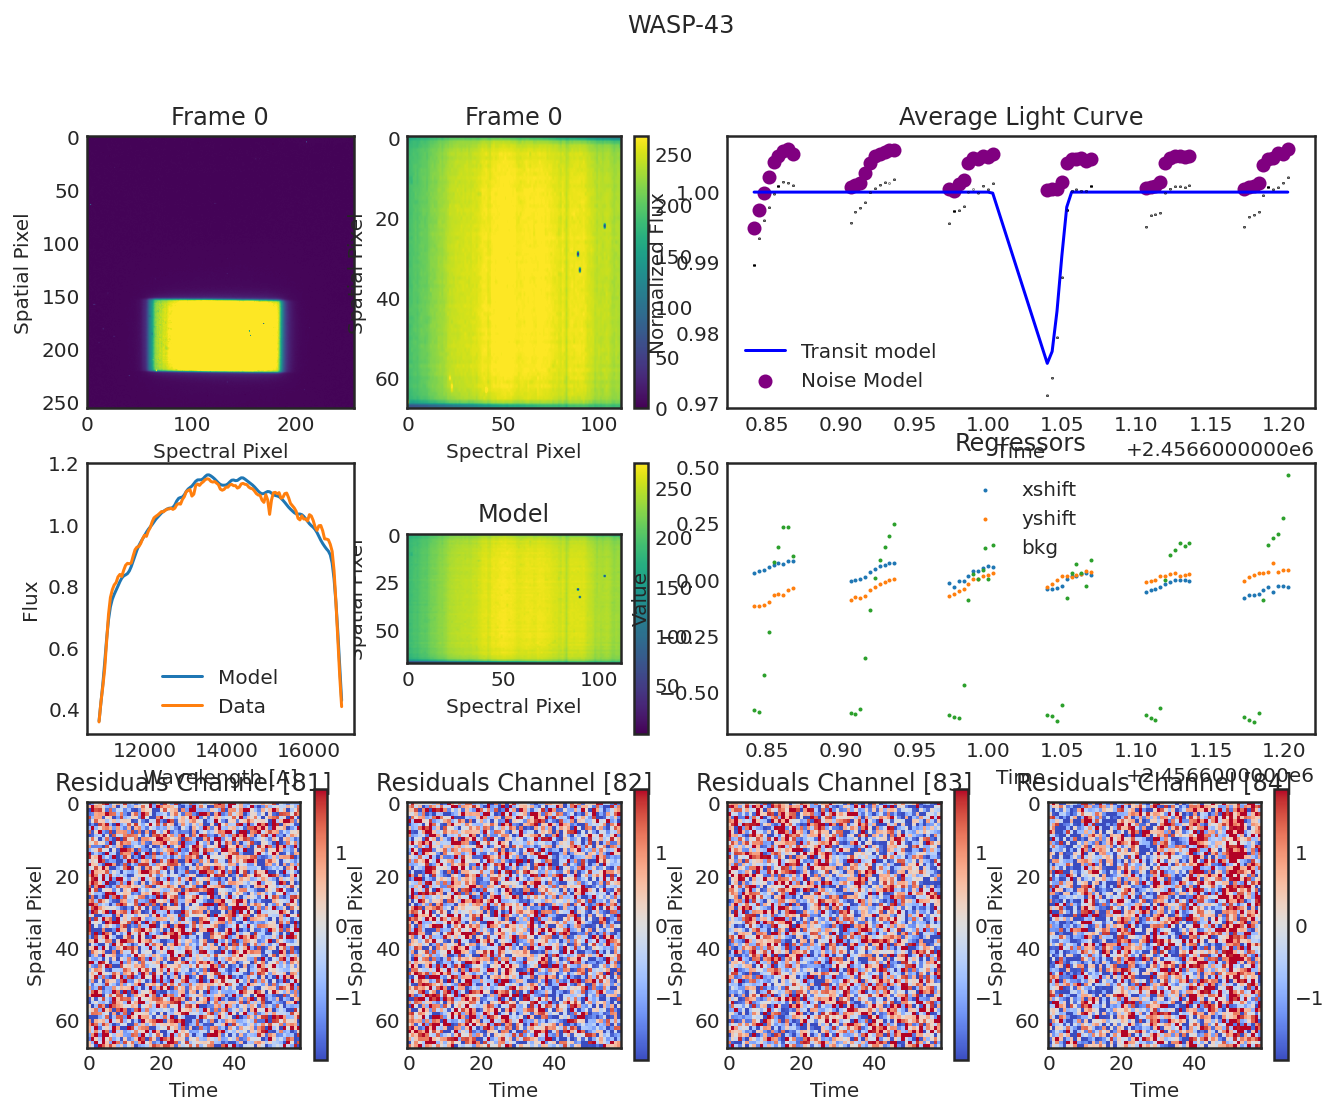

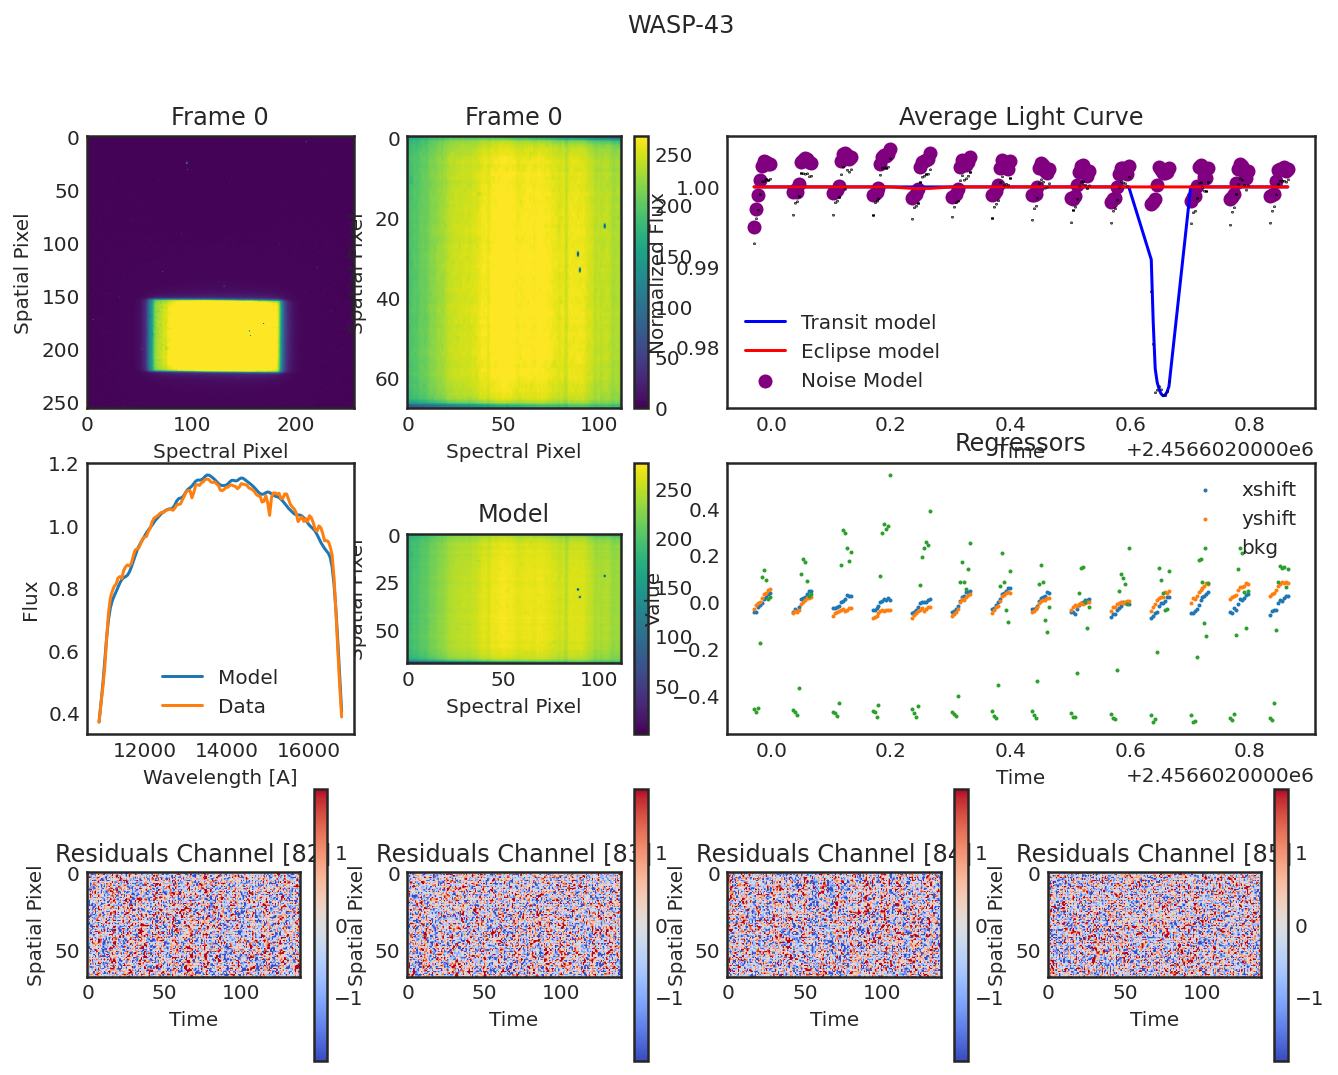

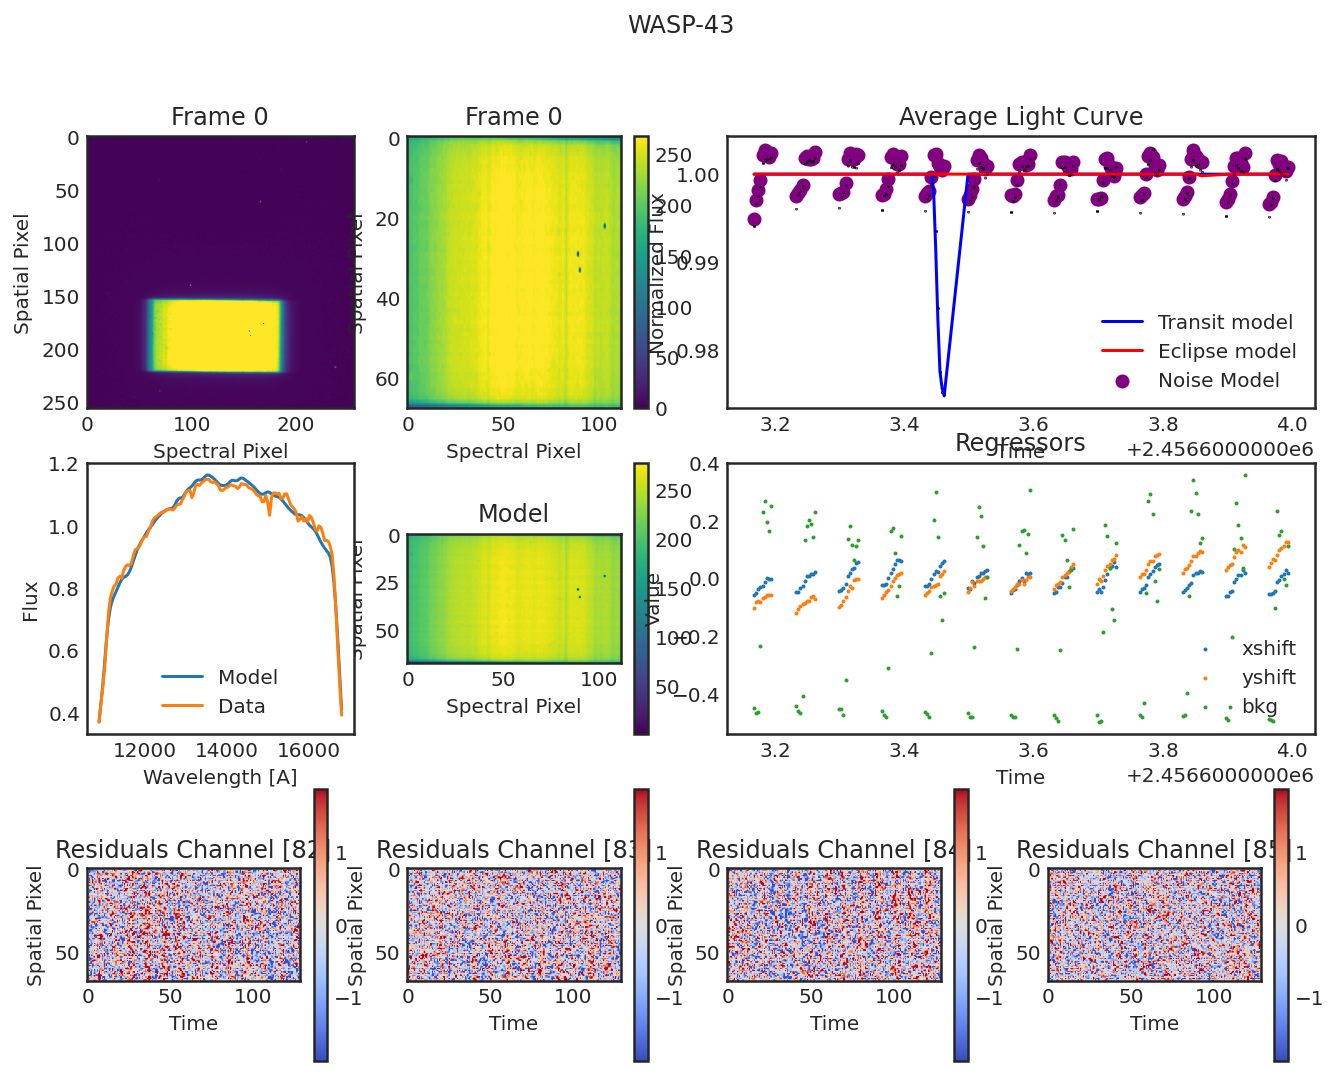

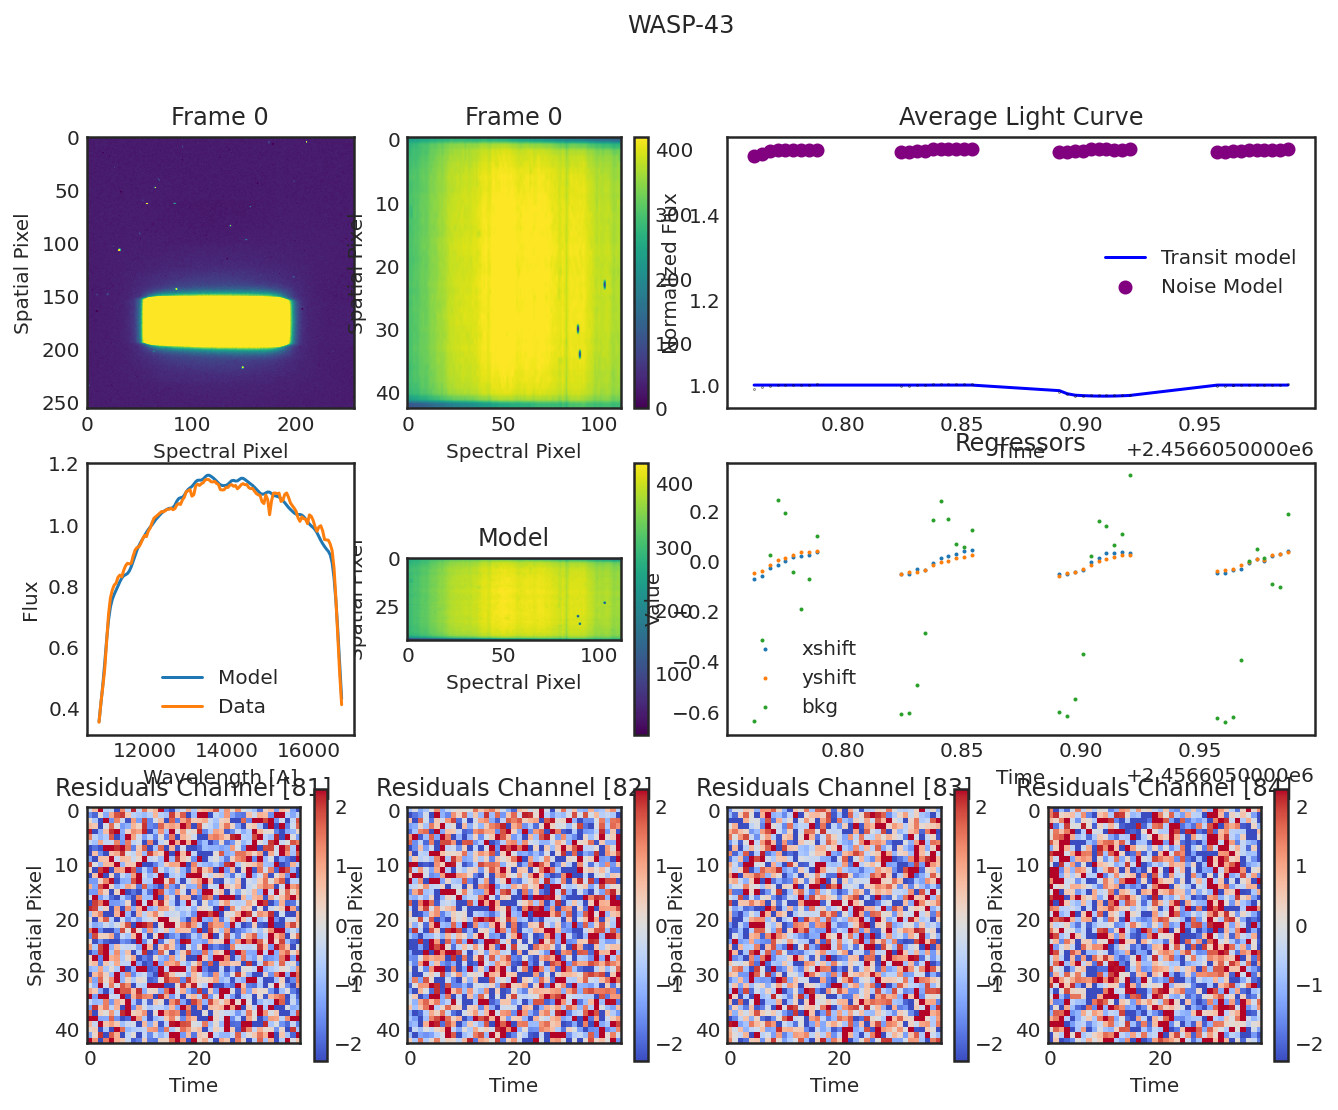

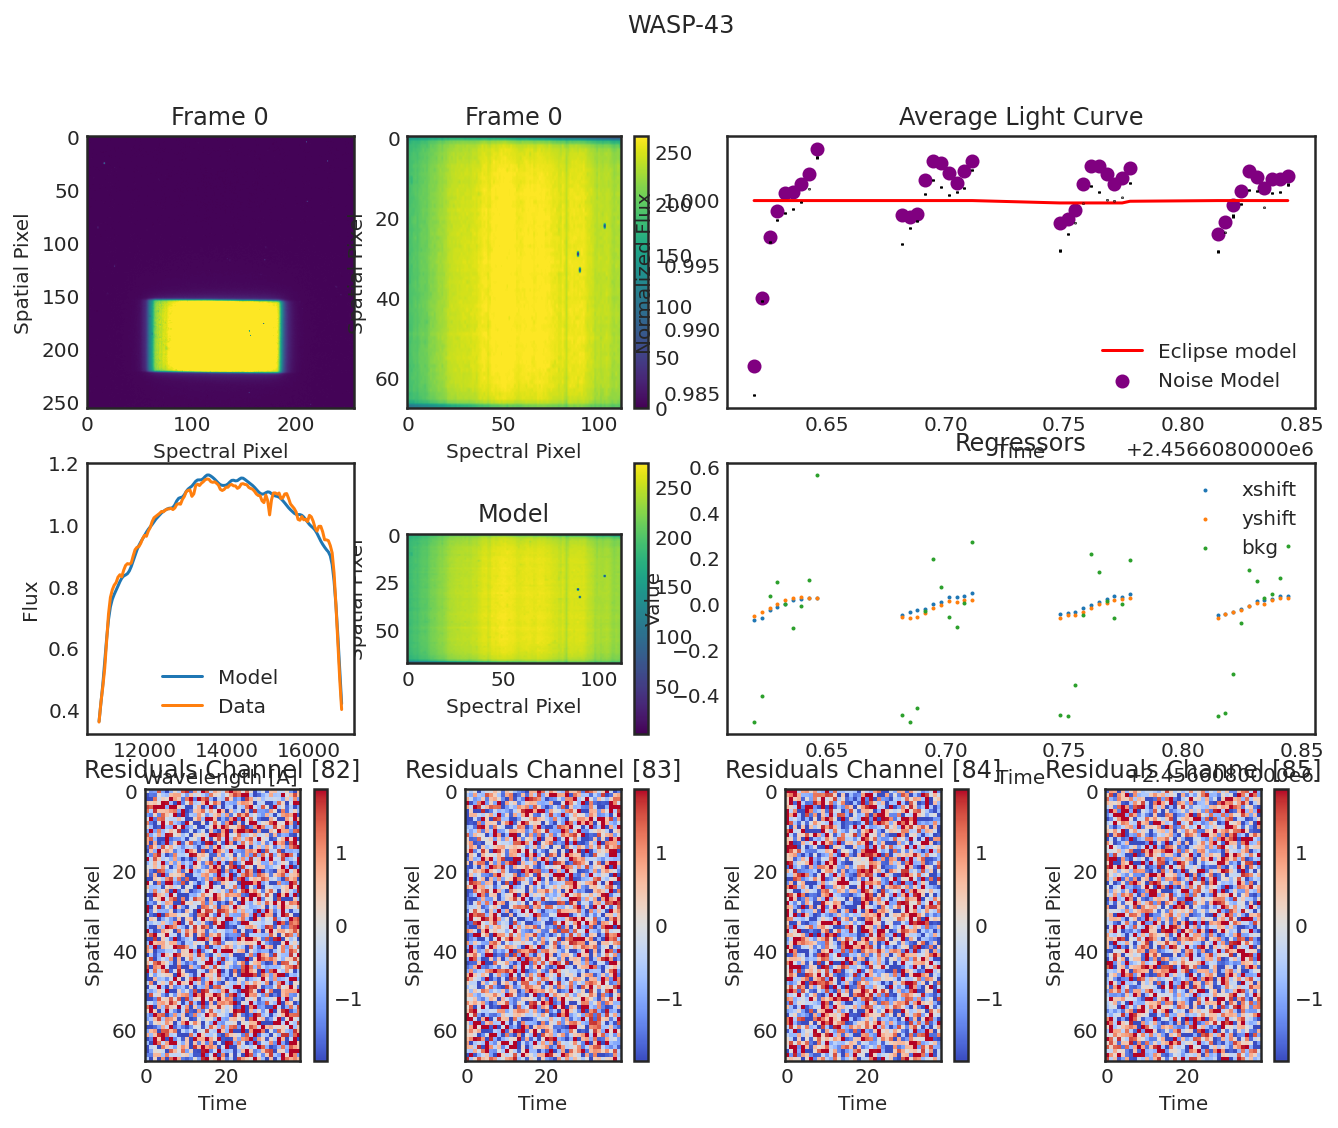

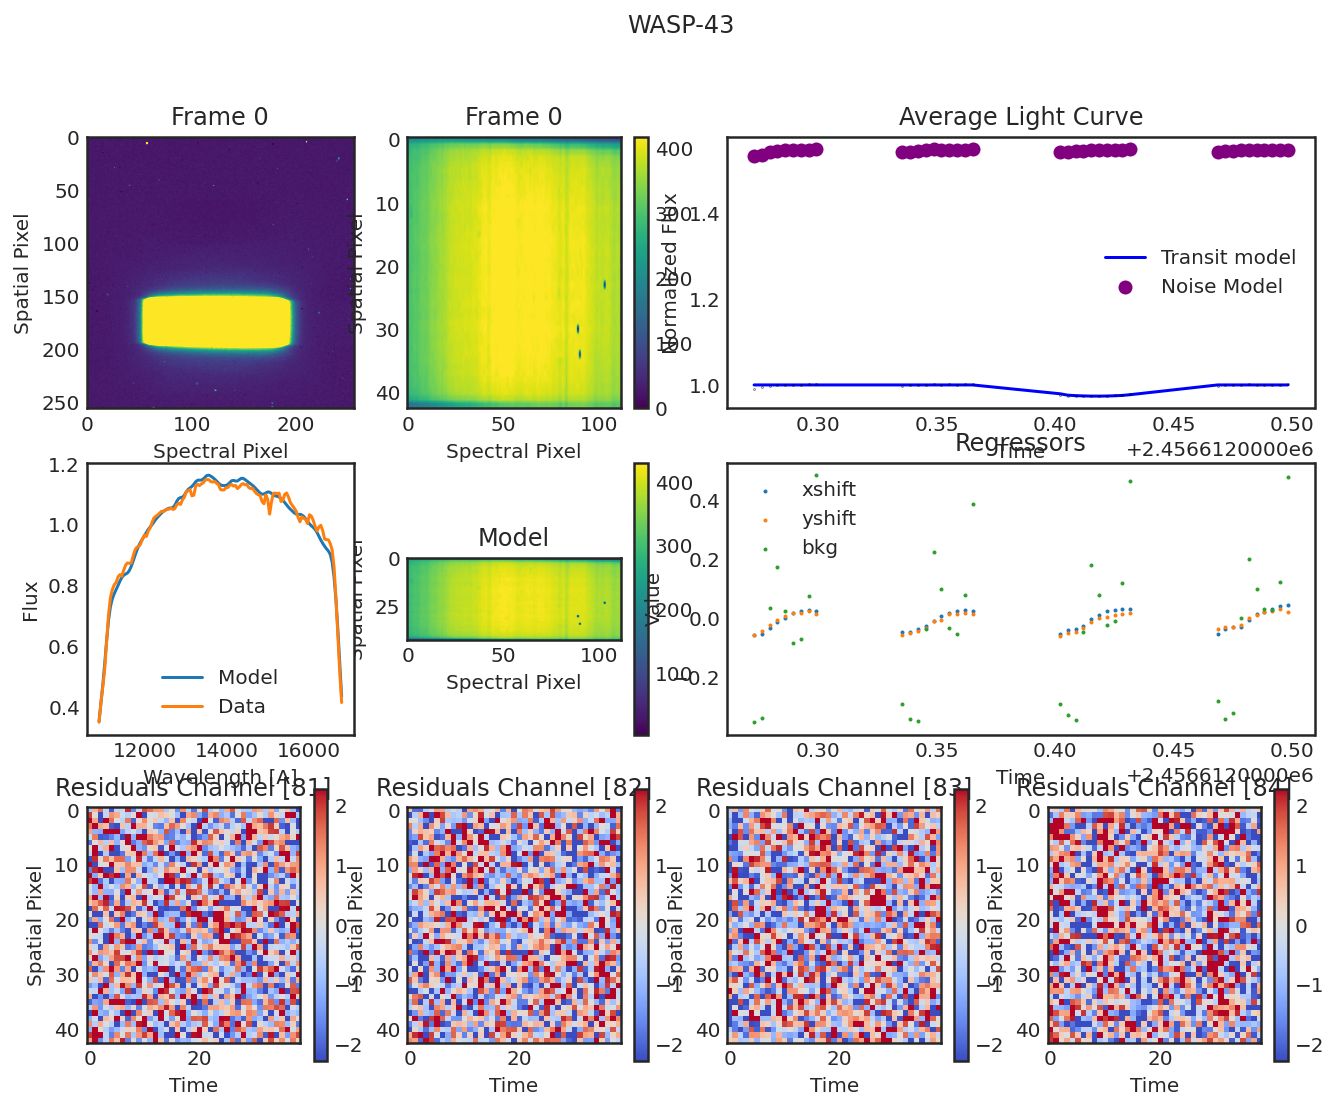

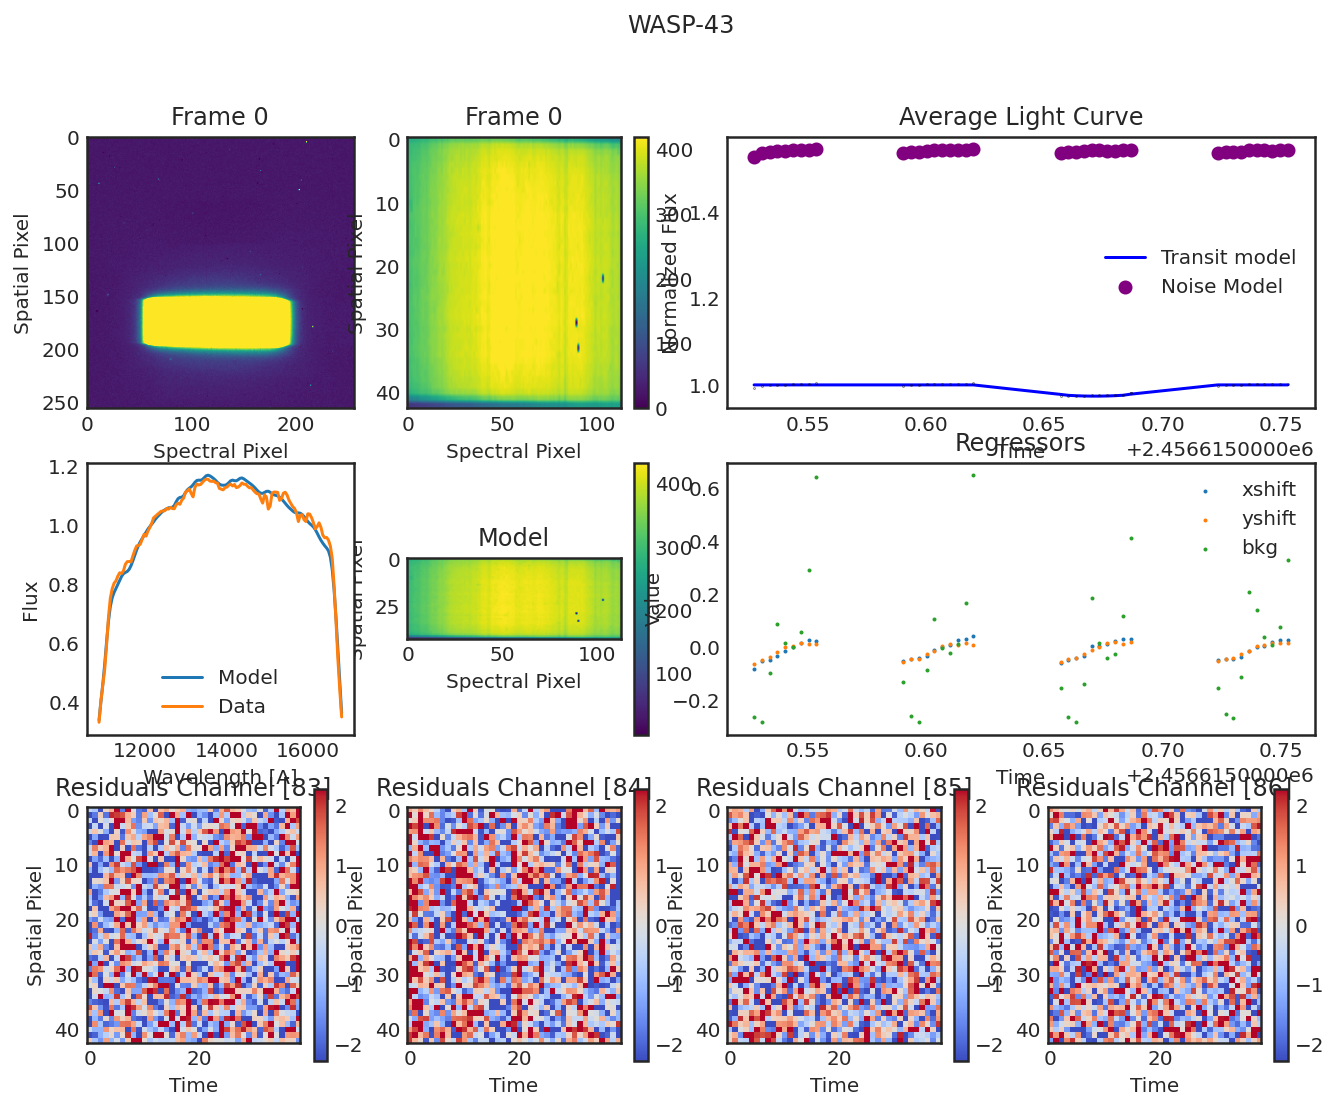

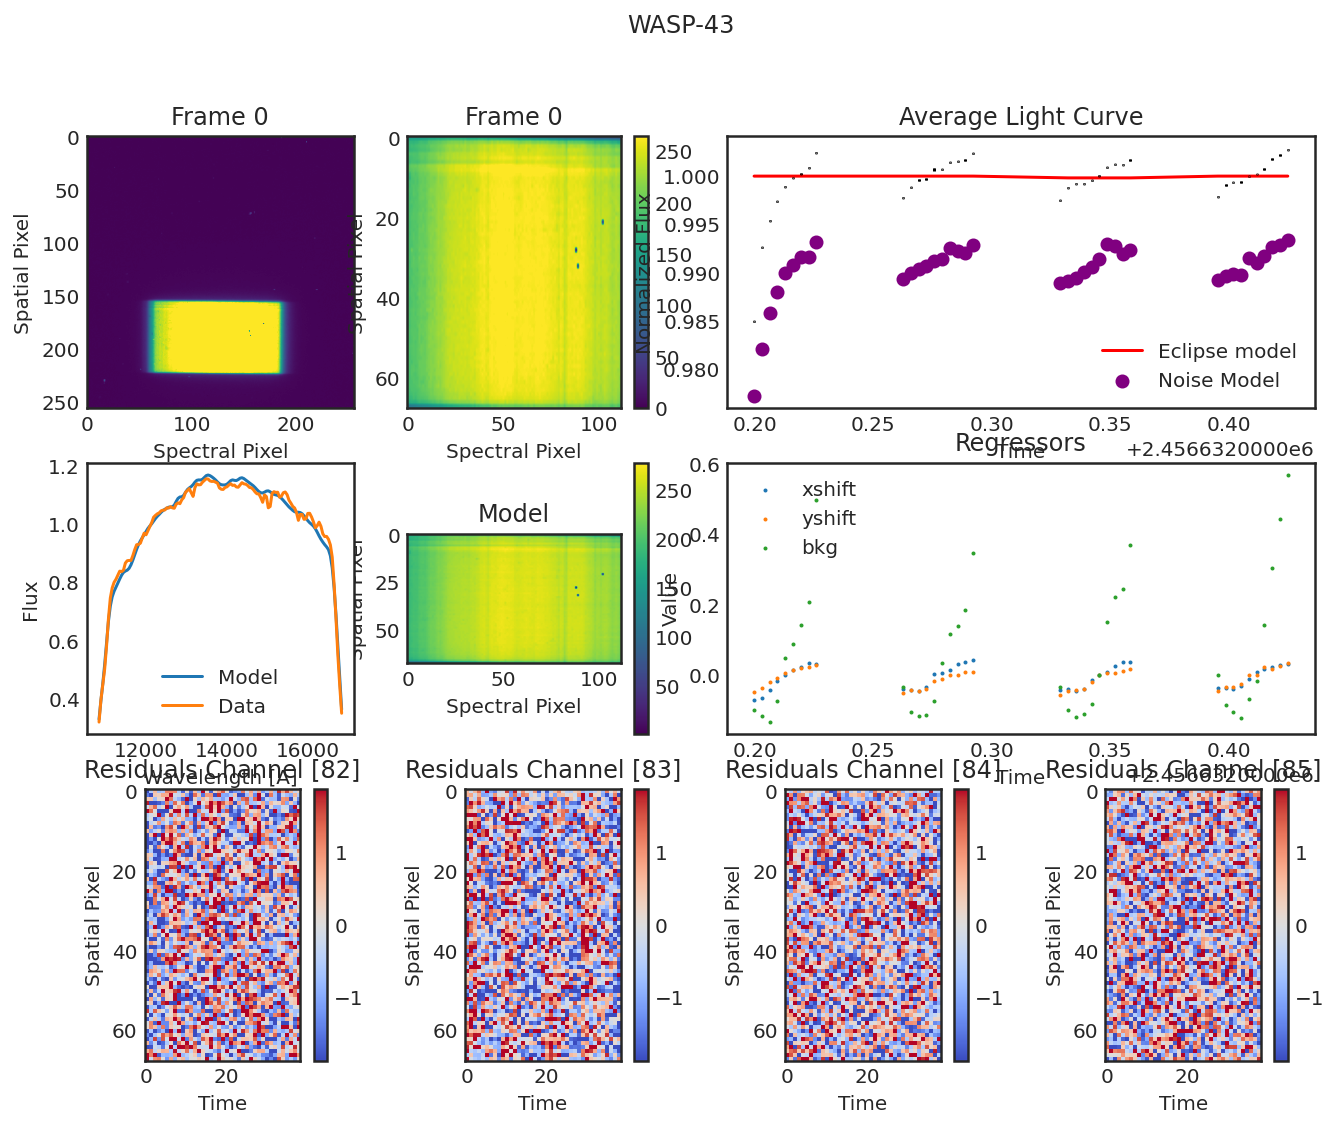

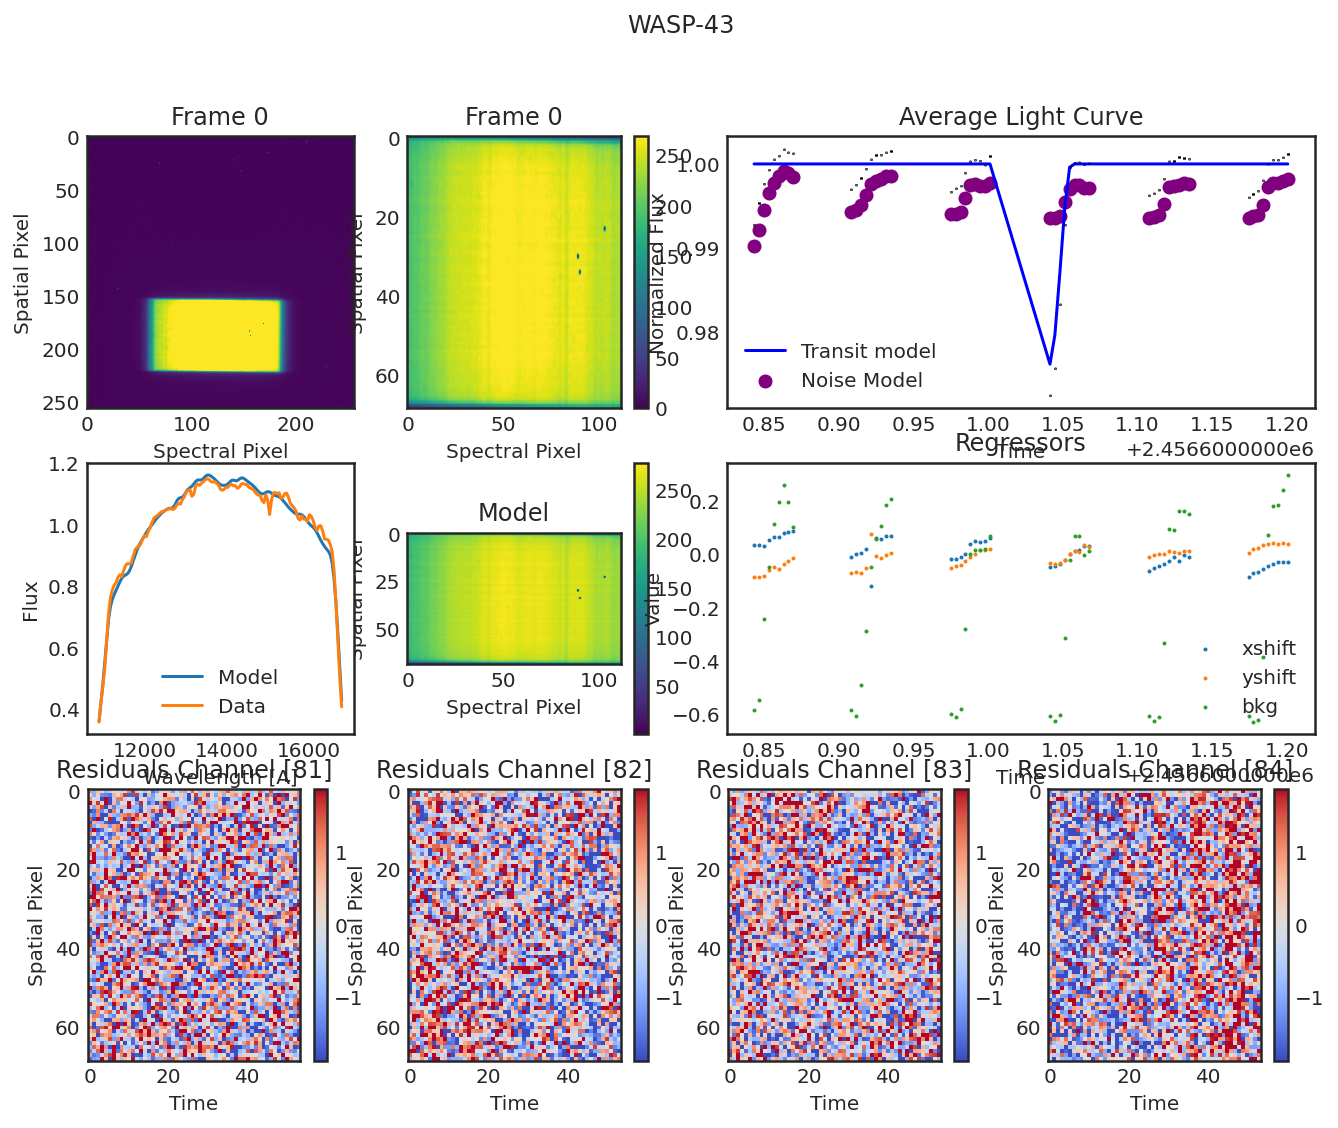

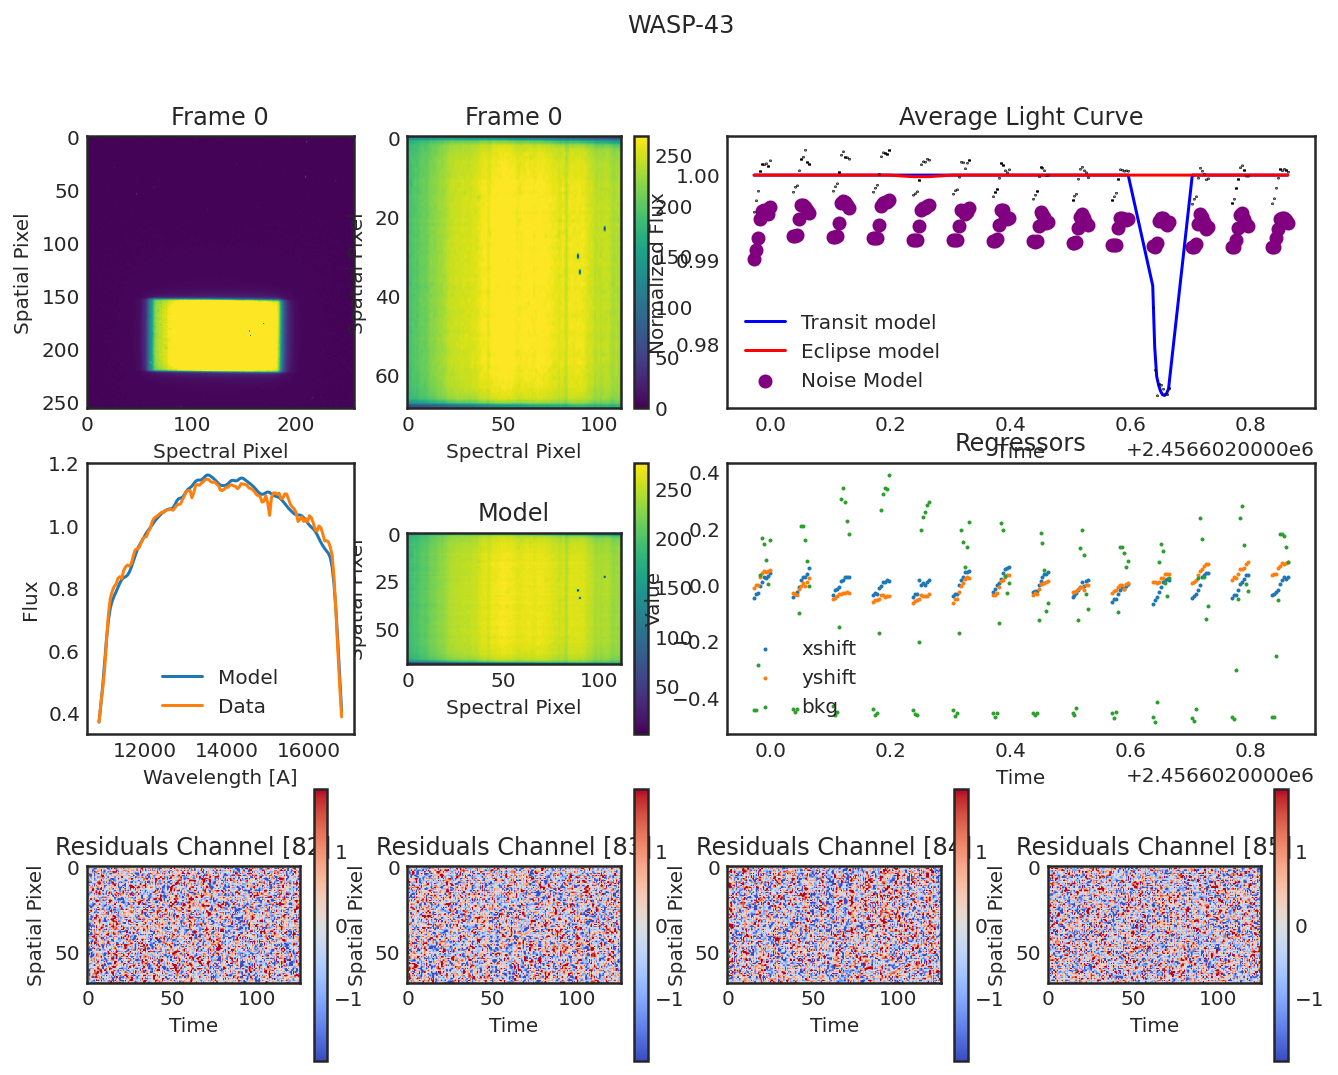

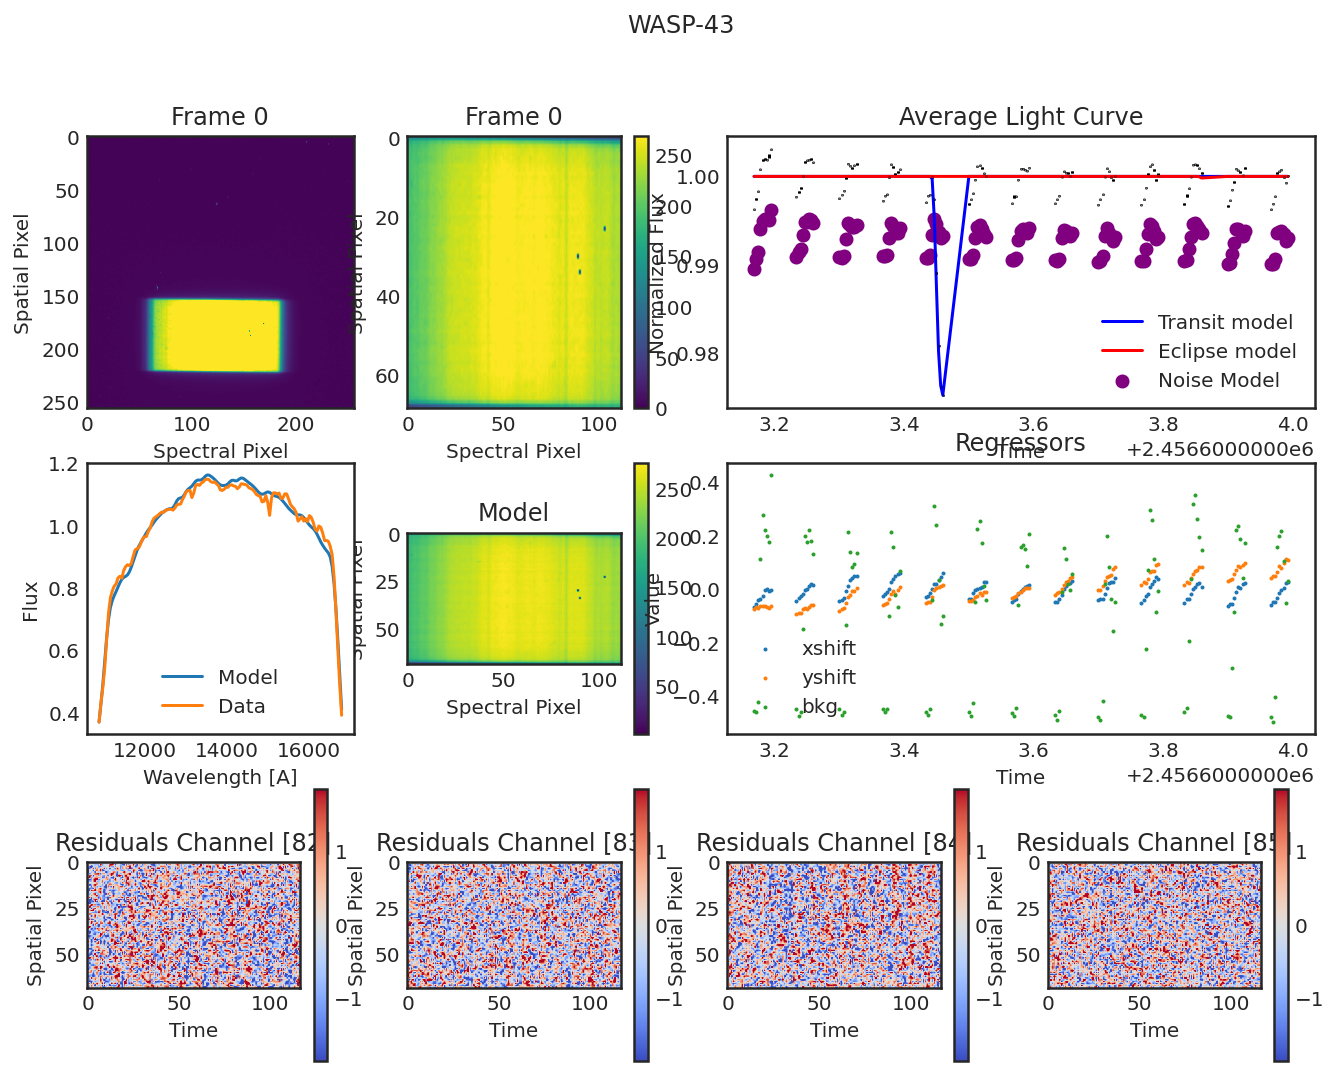

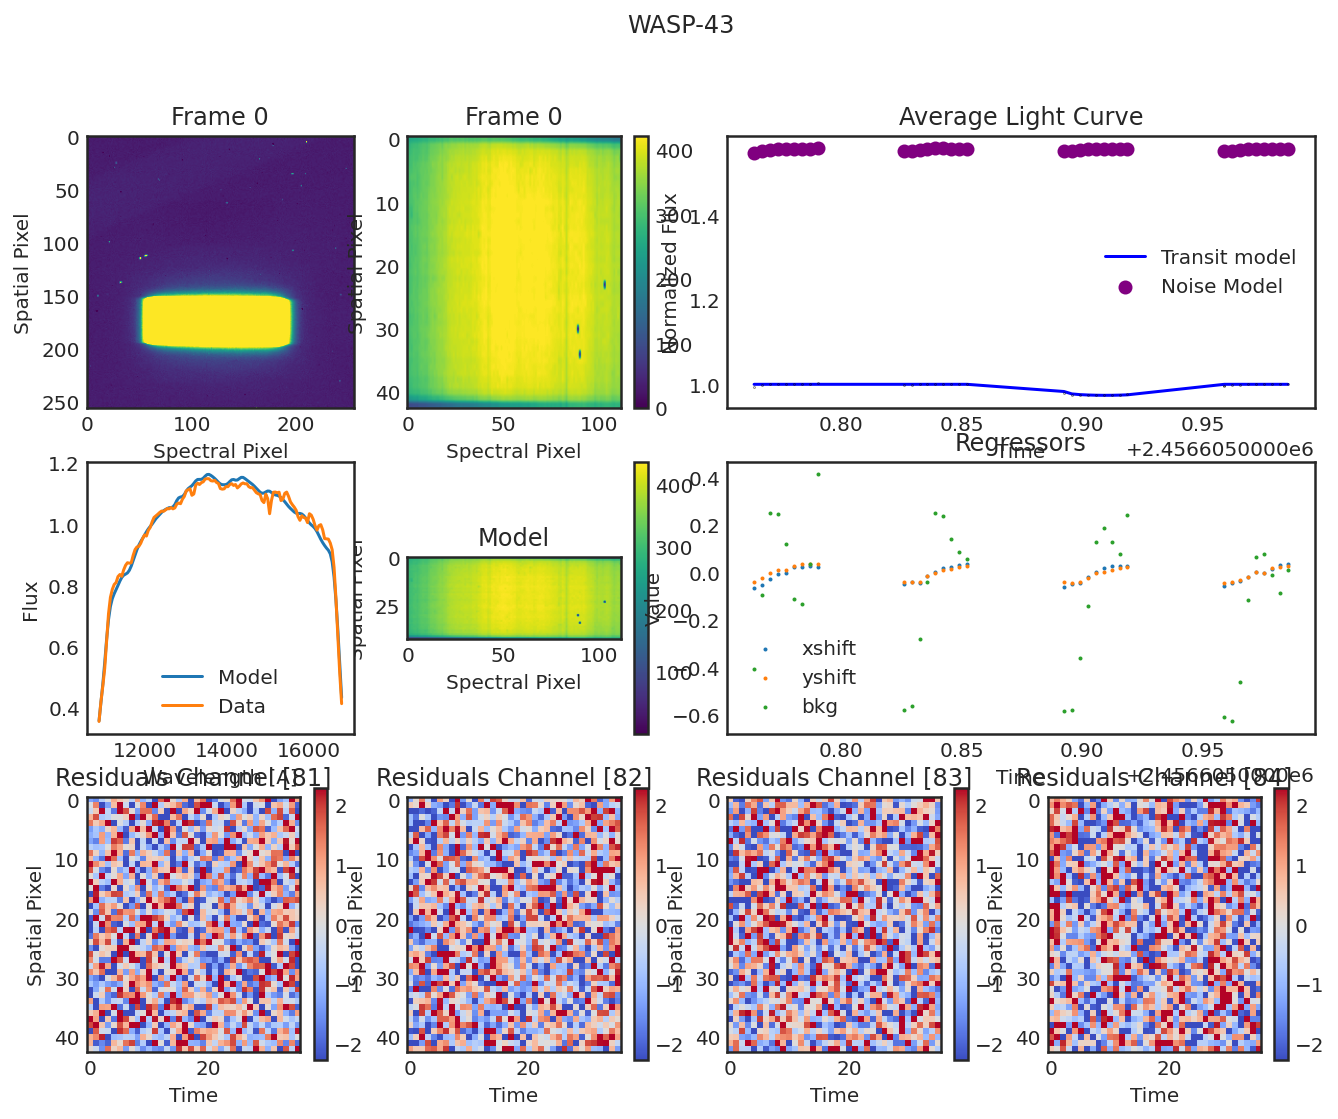

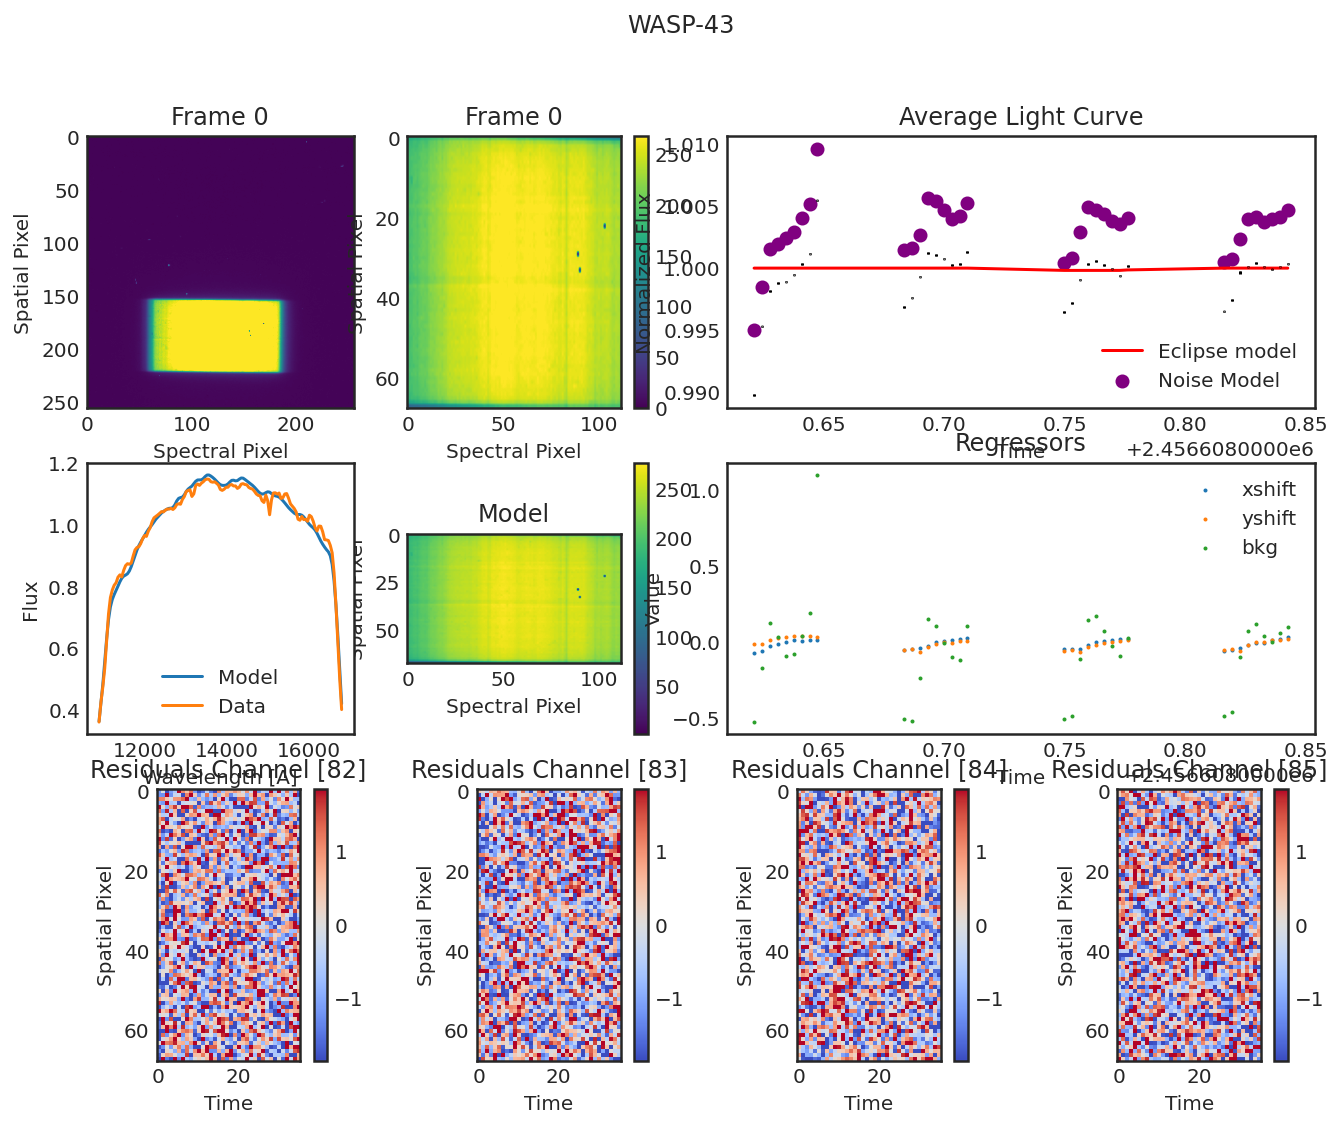

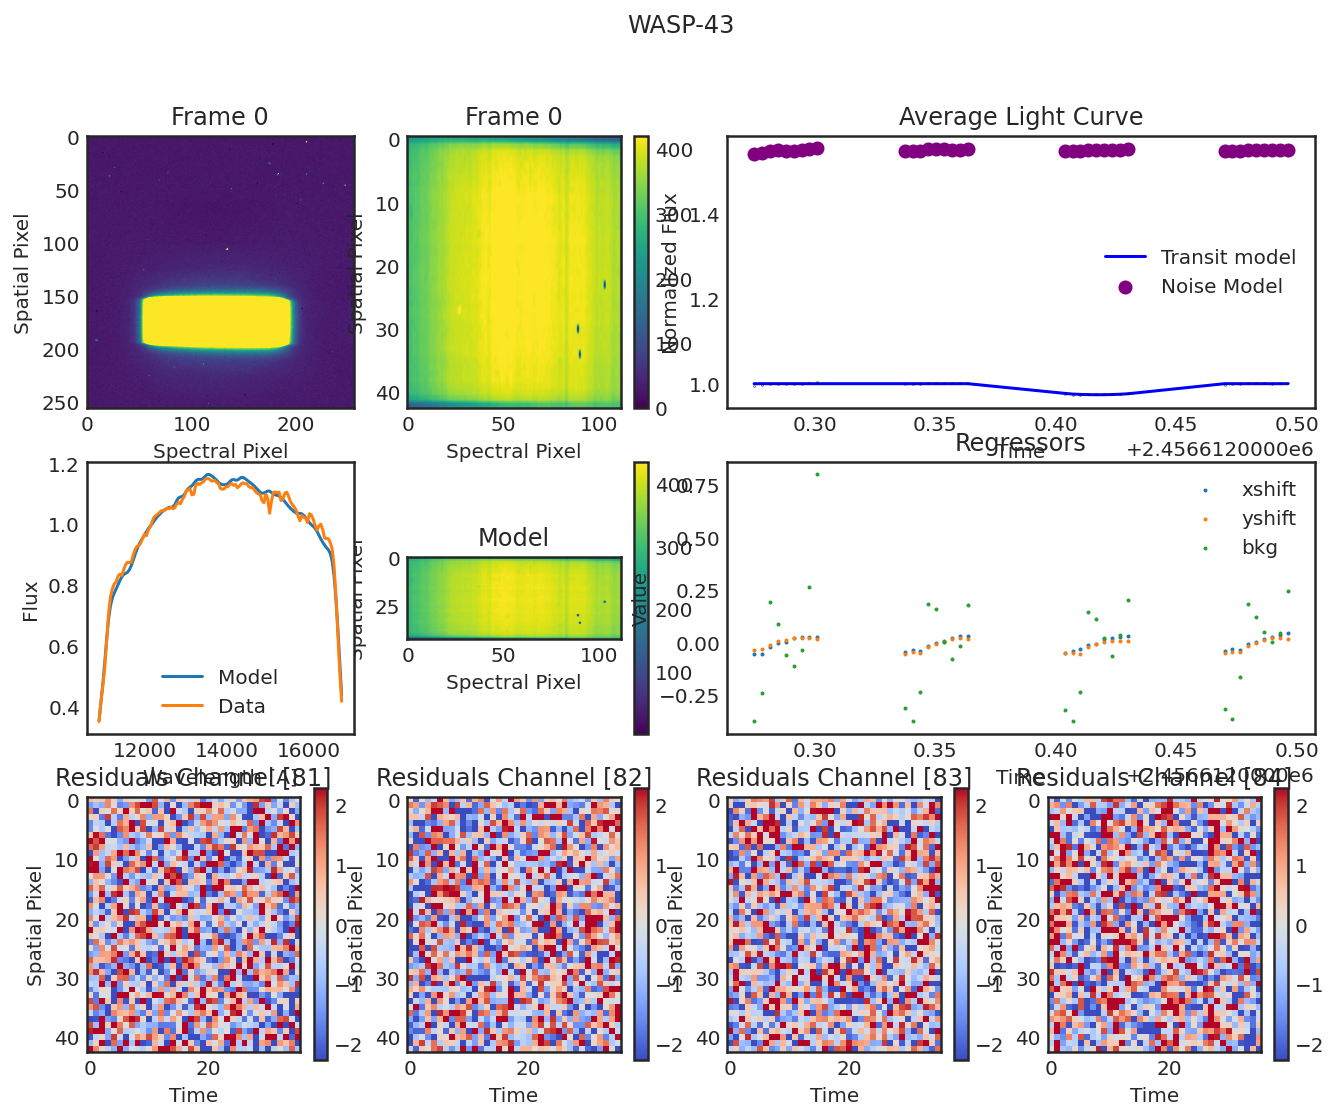

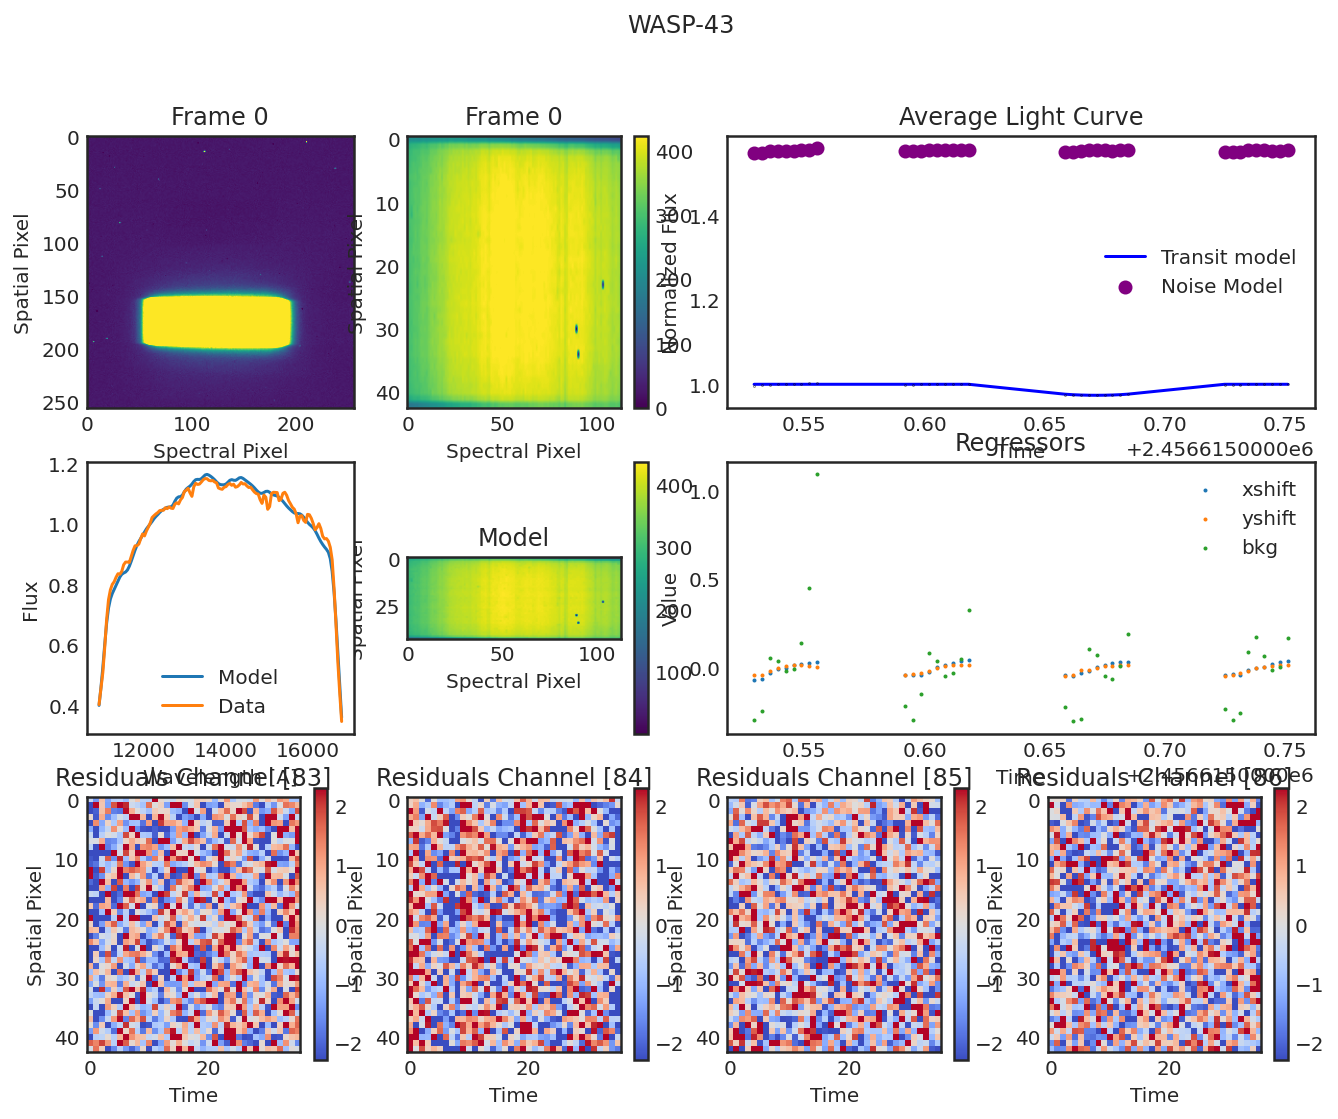

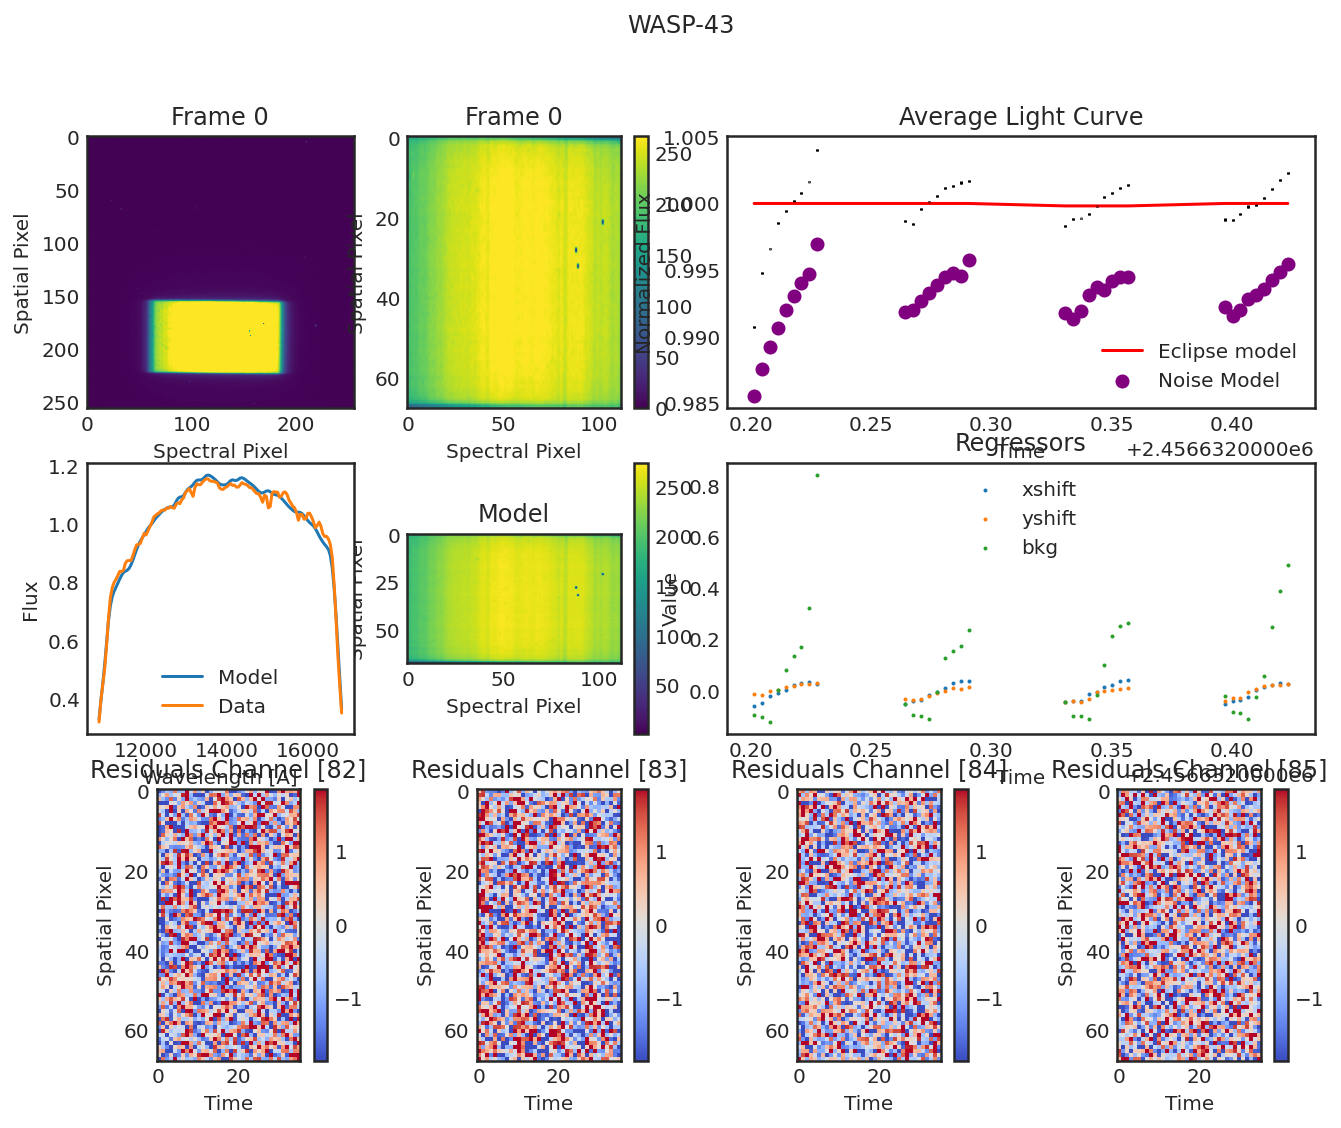

In [15]:
for visit in obs:
    visit.diagnose();
    plt.show();